# Project SIM213 - Geo-blocking and e-commerce in the European Union
### Supervisor: Prof. Lukasz Grzybowski
### Team: Maxime Gaby Bustros and Ruila Puskas-Juhasz


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import pandas as pd
database = pd.read_spss('ZA7554_v1-0-0.sav')

In [3]:
## Enables horizontal scrolling for output windows
from IPython.core.display import HTML
display(HTML("<style>pre { white-space: pre !important; }</style>"))

In [4]:
# Deep copy to modify
newDatabase = database.copy()

## Clean Database

### Filter question by yes or no if someone uses the internet

In [5]:
newDatabase['d8a'] = newDatabase['d8a'].replace(['Never', 'No Internet access (DO NOT READ OUT)'],'0');
newDatabase['d8a'] = newDatabase['d8a'].replace(['DK/NA (DO NOT READ OUT)', 'Two or three times a month', 'Two or three times a week', 'About once a week', 'Every day or almost every day', 'Less often'], '1')

### Filter question on download or stream content

In [6]:
# Filter q4_1
newDatabase['q4_1'] = newDatabase['q4_1'].replace(['NaN', 'Never', 'DK/NA (DO NOT READ OUT)'], '0');
newDatabase['q4_1'] = newDatabase['q4_1'].replace(['Less often', 'Every day or almost every day', 'At least once a month', 'At least once a week'],'1');
newDatabase['q4_1'].fillna('0', inplace = True);
# Filter q4_2
newDatabase['q4_2'] = newDatabase['q4_2'].replace(['NaN', 'Never', 'DK/NA (DO NOT READ OUT)'], '0');
newDatabase['q4_2'] = newDatabase['q4_2'].replace(['Less often', 'Every day or almost every day', 'At least once a month', 'At least once a week'],'1');
newDatabase['q4_2'].fillna('0', inplace = True);
# Filter q4_3
newDatabase['q4_3'] = newDatabase['q4_3'].replace(['NaN', 'Never', 'DK/NA (DO NOT READ OUT)'], '0');
newDatabase['q4_3'] = newDatabase['q4_3'].replace(['Less often', 'Every day or almost every day', 'At least once a month', 'At least once a week'],'1');
newDatabase['q4_3'].fillna('0', inplace = True);
# Filter q4_4
newDatabase['q4_4'] = newDatabase['q4_4'].replace(['NaN', 'Never', 'DK/NA (DO NOT READ OUT)'], '0');
newDatabase['q4_4'] = newDatabase['q4_4'].replace(['Less often', 'Every day or almost every day', 'At least once a month', 'At least once a week'],'1');
newDatabase['q4_4'].fillna('0', inplace = True);
# Filter q4_5
newDatabase['q4_5'] = newDatabase['q4_5'].replace(['NaN', 'Never', 'DK/NA (DO NOT READ OUT)'], '0');
newDatabase['q4_5'] = newDatabase['q4_5'].replace(['Less often', 'Every day or almost every day', 'At least once a month', 'At least once a week'],'1');
newDatabase['q4_5'].fillna('0', inplace = True);

### Replace Male female by female 1 or 0

In [7]:
newDatabase['d2'] = newDatabase['d2'].replace('Male', '0');
newDatabase['d2'] = newDatabase['d2'].replace('Female', '1');

### Replace Phone Ownership by 1/0 instead of Yes/No

In [8]:
# newDatabase['d18'] = newDatabase['d18'].replace('Yes', '1');
# newDatabase['d18'] = newDatabase['d18'].replace(['No', 'NaN'], '0');
# newDatabase['d18'].fillna('0', inplace = True);

In [9]:
newDatabase['d19'] = newDatabase['d19'].replace(['DK', 'Refusal'], 0);
newDatabase['d19'] = newDatabase['d19'].astype('float32')
newDatabase['d19'] = newDatabase['d19'].where(newDatabase['d19'] < 1.0,  1)

In [10]:
pd.set_option('display.max_rows', 10)
print(newDatabase['d19'].value_counts())

1.0    26424
0.0      159
Name: d19, dtype: int64


### Clean Age Values

In [11]:
newDatabase['d1'] = newDatabase['d1'].replace('98 years', '98');
newDatabase['d1'] = newDatabase['d1'].replace('15 years', '15');

### Replace by bought or not bought for each question

In [12]:
print(newDatabase['q5_1'].unique())

[NaN, Paid per item, Paid a subscription, Free of charge without registration, Free of charge upon registration (including fr..., DK/NA (DO NOT READ OUT)]
Categories (5, object): [Paid per item, Paid a subscription, Free of charge without registration, Free of charge upon registration (including fr..., DK/NA (DO NOT READ OUT)]


In [13]:
newDatabase['q5_1'] = newDatabase['q5_1'].replace(['Paid a subscription','Paid per item'], '1');
newDatabase['q5_1'] = newDatabase['q5_1'].replace(['Free of charge without registration','DK/NA (DO NOT READ OUT)','Free of charge upon registration (including free subscription)'], '0');
newDatabase['q5_1'].fillna('0', inplace = True);

newDatabase['q5_2'] = newDatabase['q5_2'].replace(['Paid a subscription','Paid per item'], '1');
newDatabase['q5_2'] = newDatabase['q5_2'].replace(['Free of charge without registration','DK/NA (DO NOT READ OUT)','Free of charge upon registration (including free subscription)'], '0');
newDatabase['q5_2'].fillna('0', inplace = True);

newDatabase['q5_3'] = newDatabase['q5_3'].replace(['Paid a subscription','Paid per item'], '1');
newDatabase['q5_3'] = newDatabase['q5_3'].replace(['Free of charge without registration','DK/NA (DO NOT READ OUT)','Free of charge upon registration (including free subscription)'], '0');
newDatabase['q5_3'].fillna('0', inplace = True);

newDatabase['q5_4'] = newDatabase['q5_4'].replace(['Paid a subscription','Paid per item'], '1');
newDatabase['q5_4'] = newDatabase['q5_4'].replace(['Free of charge without registration','DK/NA (DO NOT READ OUT)','Free of charge upon registration (including free subscription)'], '0');
newDatabase['q5_4'].fillna('0', inplace = True);

newDatabase['q5_5'] = newDatabase['q5_5'].replace(['Paid a subscription','Paid per item'], '1');
newDatabase['q5_5'] = newDatabase['q5_5'].replace(['Free of charge without registration','DK/NA (DO NOT READ OUT)','Free of charge upon registration (including free subscription)'], '0');
newDatabase['q5_5'].fillna('0', inplace = True);

In [14]:
newDatabase['q5_6'] = newDatabase['q5_1'].astype("int64") + newDatabase['q5_2'].astype("int64") + newDatabase['q5_3'].astype("int64") + newDatabase['q5_4'].astype("int64") + newDatabase['q5_5'].astype("int64");
newDatabase['q5_6'] = newDatabase['q5_6'].replace([2,3,4,5],1);

In [15]:
# Number of people who payed for any type of subscription or service
newDatabase['q5_6'].value_counts()

0    20722
1     5861
Name: q5_6, dtype: int64

### Filter By Country

In [16]:
entriesByCountry = {};
for i, country in enumerate(newDatabase['tnscntry'].unique()):
    arr = [];
    for entry in newDatabase['tnscntry']:
        if (entry == country):
            arr.append(True);
        else:
            arr.append(False);
    entriesByCountry[country] = newDatabase[arr];

In [17]:
# average age, percentage of females asked. Age differences acrosse countries.

### Descriptive Statistics by country

In [18]:
arr = []
for entries in entriesByCountry:
    percentInternetUsers = entriesByCountry[entries]['d8a'].astype("int64").mean() * 100;
    percentOfFemales = entriesByCountry[entries]['d2'].astype("int64").mean() * 100;
    averageAge = entriesByCountry[entries]['d1'].astype('int64').mean();
    averagePhoneOwnership = entriesByCountry[entries]['d19'].astype('float64').mean() * 100;
    percentageOfOnlineCustomers = entriesByCountry[entries]['q5_6'].astype('int64').mean() * 100;
    arr.append([entries, len(entriesByCountry[entries]), round(percentOfFemales,1), round(averageAge,1), round(averagePhoneOwnership,1), round(percentInternetUsers,1), round(percentageOfOnlineCustomers,1)]);
    

df = pd.DataFrame(arr, columns=['Country', 'Nb of Respondents','% of Females Asked', 'Average Age', '% Who own a phone', '% of People who use the Internet','% of People who buy Online']);

# Add mean
mean = ['AVG value', round(df['Nb of Respondents'].mean(),1), round(df['% of Females Asked'].mean(),1), round(df['Average Age'].mean(),1), round(df['% Who own a phone'].mean(),1), round(df['% of People who use the Internet'].mean(),1), round(df['% of People who buy Online'].mean(),1)];
df.loc[len(df)] = mean;

std = ['STD of values', round(df['Nb of Respondents'].std(),1), round(df['% of Females Asked'].std(),1), round(df['Average Age'].std(),1), round(df['% Who own a phone'].std(),1), round(df['% of People who use the Internet'].std(),1), round(df['% of People who buy Online'].std(),1)];
df.loc[len(df)] = std;

In [19]:
#temporaly set expand_frame_repr
with pd.option_context('expand_frame_repr', False):
    print(df.to_string(index=False))

            Country  Nb of Respondents  % of Females Asked  Average Age  % Who own a phone  % of People who use the Internet  % of People who buy Online
           BELGIQUE             1010.0                54.6         57.7               98.3                              81.6                        22.3
            DANMARK             1002.0                51.7         57.2               99.6                              91.2                        46.3
             ELLADA             1004.0                51.9         50.5               99.7                              84.0                        13.1
             ESPANA             1000.0                51.8         50.2               99.7                              87.2                        26.1
              SUOMI             1002.0                42.7         58.5               99.2                              85.1                        30.4
             FRANCE             1006.0                54.6         58.8           

In [20]:
print('Country with highest average age');
d1 = df.iloc[df['Average Age'].idxmax()];
print(d1['Country'], d1['Average Age']);
print();

print('Country with highest % of Phone Owners');
d2 = df.iloc[df['% Who own a phone'].idxmax()];
print(d2['Country'], d2['% Who own a phone']);
print();

print('Country with highest % of internet Users');
d3 = df.iloc[df['% of People who use the Internet'].idxmax()]
print(d3['Country'], d3['% of People who use the Internet']);
print();

print('Country with highest % of Online customers');
d4 = df.iloc[df['% of People who buy Online'].idxmax()]
print(d4['Country'], d4['% of People who buy Online']);
print();

Country with highest average age
SVERIGE 62.1

Country with highest % of Phone Owners
KYPROS 100.0

Country with highest % of internet Users
LUXEMBOURG 97.0

Country with highest % of Online customers
LUXEMBOURG 52.2



### Bar chart showing internet usage per country

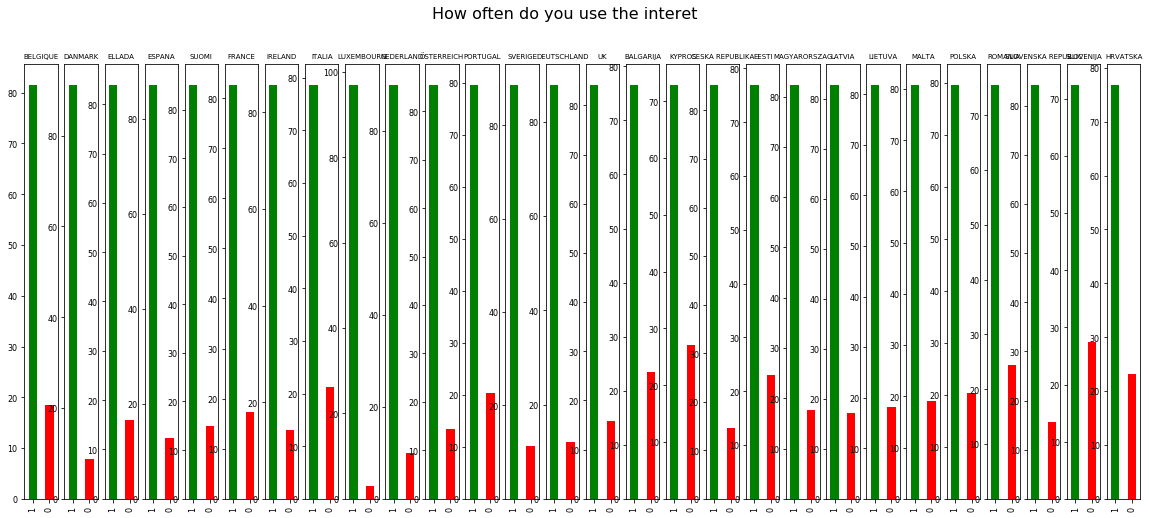

In [21]:
fig = plt.figure()
fig.suptitle('How often do you use the interet', fontsize=16)
subplots = {}
for index, country in enumerate(entriesByCountry):
    entries = entriesByCountry[country]
    numberOfEntries = entries['d8a'].count()
    barfreq = entries['d8a'].value_counts() / numberOfEntries * 100;
    subplots[country] = plt.subplot(1, 28, index+1);
    subplots[country].set_title(country, size=7)
    barfreq.plot.bar(fontsize=8, ax=subplots[country], figsize=(20,8), color=['green', 'red']);
    
#put in percentage#############

### Filter By Age Bracket

In [22]:
entriesByAgeBracket = {};

under20arr = []
over20under40arr = []
over40under65arr = []
over65arr = [];

for i, entry in enumerate(newDatabase['d1']):
    floatv = float(entry)
    if (floatv < 20):
        under20arr.append(newDatabase.iloc[i]);
    elif (floatv < 40):
        over20under40arr.append(newDatabase.iloc[i]);
    elif (floatv < 65):
        over40under65arr.append(newDatabase.iloc[i]);
    else:
        over65arr.append(newDatabase.iloc[i]);
        
entriesByAgeBracket['under20'] = pd.DataFrame(under20arr)
entriesByAgeBracket['over20under40'] = pd.DataFrame(over20under40arr)
entriesByAgeBracket['over40under65'] = pd.DataFrame(over40under65arr)
entriesByAgeBracket['over65'] = pd.DataFrame(over65arr)

### Descriptive statistics by age bracket

In [23]:
arr = []
for entries in entriesByAgeBracket:
    percentInternetUsers = entriesByAgeBracket[entries]['d8a'].astype("int64").mean() * 100;
    percentOfFemales = entriesByAgeBracket[entries]['d2'].astype("int64").mean() * 100;
    averageAge = entriesByAgeBracket[entries]['d1'].astype('int64').mean();
    averagePhoneOwnership = entriesByAgeBracket[entries]['d19'].astype('float64').mean() * 100;
    percentageOfOnlineCustomers = entriesByAgeBracket[entries]['q5_6'].astype('int64').mean() * 100;
    arr.append([entries, len(entriesByAgeBracket[entries]), round(percentOfFemales,1), round(averageAge,1), round(averagePhoneOwnership,1), round(percentInternetUsers,1), round(percentageOfOnlineCustomers,1)]);
    

df = pd.DataFrame(arr, columns=['AgeBracket', 'Nb of Respondents','% of Females Asked', 'Average Age', '% Who own a phone', '% of People who use the Internet','% of People who buy Online']);

# Add mean
mean = ['AVG value', round(df['Nb of Respondents'].mean(),1), round(df['% of Females Asked'].mean(),1), round(df['Average Age'].mean(),1), round(df['% Who own a phone'].mean(),1), round(df['% of People who use the Internet'].mean(),1), round(df['% of People who buy Online'].mean(),1)];
df.loc[len(df)] = mean;

std = ['STD of values', round(df['Nb of Respondents'].std(),1), round(df['% of Females Asked'].std(),1), round(df['Average Age'].std(),1), round(df['% Who own a phone'].std(),1), round(df['% of People who use the Internet'].std(),1), round(df['% of People who buy Online'].std(),1)];
df.loc[len(df)] = std;

In [24]:
#temporaly set expand_frame_repr
with pd.option_context('expand_frame_repr', False):
    print(df.to_string(index=False))
#Average age, gender (more female over 65 but not so informative) asked not so important 
#percentage of respondents instead of nb of respondents. 

    AgeBracket  Nb of Respondents  % of Females Asked  Average Age  % Who own a phone  % of People who use the Internet  % of People who buy Online
       under20              606.0                44.2         17.5               99.5                              99.7                        54.8
 over20under40             4909.0                48.3         31.1               99.7                              99.1                        39.9
 over40under65            12077.0                53.7         52.7               99.5                              91.4                        23.7
        over65             8991.0                57.8         73.6               99.1                              61.0                         7.8
     AVG value             6645.8                51.0         43.7               99.4                              87.8                        31.5
 STD of values             4315.5                 5.2         21.3                0.2                           

In [25]:
# pair plot
newDatabase['useinternet'] = newDatabase['d8a'].astype('int32');
newDatabase['female'] = newDatabase['d2'].astype('int32');
newDatabase['age'] = newDatabase['d1'].astype('int32');
newDatabase['mobilephone'] = newDatabase['d19'].astype('int32');
newDatabase['onlinecustomer'] = newDatabase['q5_6'].astype('int32');
correlation_data = newDatabase[["onlinecustomer", "age", "female", "mobilephone", "useinternet"]] 

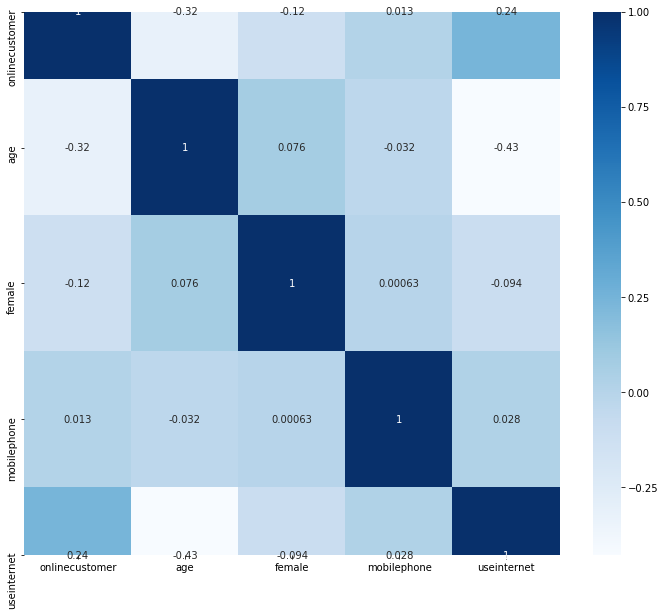

In [26]:
# Correlation matrix 
corr = correlation_data.corr() 
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(12,10)) 
sns.heatmap(corr, annot=True, cmap="Blues") 
plt.show()

## Regressions for the use of internet
### Regression by group of countries

Access to internet with respect to the country. 
<br> **We can see that the internet access linearly depends on the group of country:**
The coefficients for the OLS are close to 1, which indicates that the OLS model properly fits the distribution. Fruthermore, when looking at the test of Durbin Watson, the value is inferior to 2, showing that the autocorrelation is not strong, which means that there isn't a high seasonality. The is logic.
The Jarque Bera test enables us to check that the conditions are met to do an OLS regression: the skew is close to 0 and the kurtosis is close to 3, which means that the distribution of the errors follows a normal law. This is the case for d8a. 

In [27]:
#%pip install linearmodels
import statsmodels.api as sm
from linearmodels import PanelOLS
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [112]:
#by grouping countries we reduce the number of information --> use full set of dummy variables. 
Xcountry = pd.get_dummies(newDatabase['tnscntry'])
Xcountry2 = Xcountry
Xcountry2['MALTA'] = (Xcountry['IRELAND'] + Xcountry['MALTA']).astype(float)
#df["age"] = (df["age1"] + df["revised_age"]).astype("int")
print(Xcountry2)

tnscntry  BALGARIJA  BELGIQUE  CESKA REPUBLIKA  DANMARK  DEUTSCHLAND  EESTI  \
0                 0         1                0        0            0      0   
1                 0         1                0        0            0      0   
2                 0         1                0        0            0      0   
3                 0         1                0        0            0      0   
4                 0         1                0        0            0      0   
...             ...       ...              ...      ...          ...    ...   
26578             0         0                0        0            0      0   
26579             0         0                0        0            0      0   
26580             0         0                0        0            0      0   
26581             0         0                0        0            0      0   
26582             0         0                0        0            0      0   

tnscntry  ELLADA  ESPANA  FRANCE  HRVATSKA  ...  NE

In [107]:
# pair plot
y = newDatabase['q5_6'].dropna()
logit = sm.Logit(y, Xcountry.drop(['FRANCE'], axis=1))
logit.fit().summary()

Optimization terminated successfully.
         Current function value: 0.493885
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   q5_6   No. Observations:                26583
Model:                          Logit   Df Residuals:                    26556
Method:                           MLE   Df Model:                           26
Date:                Fri, 03 Jul 2020   Pseudo R-squ.:                 0.06375
Time:                        12:50:30   Log-Likelihood:                -13129.
converged:                       True   LL-Null:                       -14023.
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
BALGARIJA             -2.4343      0.116    -21.007      0.000      -2.661      -2.207
BELGIQUE              -1.2496      0.076    -16.525      0.000      -1.398      -1.101
CESKA REPUBLIKA       -1.3142      0.077    -16.988      0.000      -1.466      -1.163
DANMARK               -0.1480      0.063     -2.336      0.020      -0.272      -0.024
DEUTSCHLAND           -0.9198      0.070    -13.130      0.000      -1.057      -0.782
EESTI                 -2.0806      0.101    -20.668      0.000      -2.278      -1.883
ELLADA                -1.8880      0.093    -20.215      0.000      -2.071      -1.705
ESPANA                -1.0408      0.072    -14.454      0.000      -1.182      -0.900
HRVATSKA              -2.1950      0.105    -20.925      0.000      -2.401      -1.989
IRELAND               -0.3303      0.064     -5.157      0.000      -0.456      -0.205
ITALIA                -1.4435      0.080    -17.944      0.000      -1.601      -1.286
KYPROS                -2.0640      0.141    -14.679      0.000      -2.340      -1.788
LATVIA                -1.7663      0.090    -19.723      0.000      -1.942      -1.591
LIETUVA               -1.8236      0.091    -19.950      0.000      -2.003      -1.644
LUXEMBOURG             0.0874      0.089      0.980      0.327      -0.087       0.262
MAGYARORSZAG          -2.4353      0.116    -21.017      0.000      -2.662      -2.208
MALTA                 -1.3280      0.109    -12.157      0.000      -1.542      -1.114
NEDERLAND             -0.6621      0.066     -9.959      0.000      -0.792      -0.532
POLSKA                -1.4052      0.080    -17.673      0.000      -1.561      -1.249
PORTUGAL              -1.8834      0.093    -20.160      0.000      -2.066      -1.700
ROMANIA               -2.4467      0.117    -20.994      0.000      -2.675      -2.218
SLOVENIJA             -2.2117      0.106    -20.892      0.000      -2.419      -2.004
SLOVENSKA REPUBLIC    -1.7562      0.089    -19.730      0.000      -1.931      -1.582
SUOMI                 -0.8265      0.069    -12.038      0.000      -0.961      -0.692
SVERIGE               -0.4222      0.065     -6.529      0.000      -0.549      -0.295
UK                    -0.3204      0.064     -5.004      0.000      -0.446      -0.195
ÖSTERREICH            -0.0546      0.100     -0.548      0.584      -0.250       0.141
======================================================================================
"""

### Regression by sex

In [30]:
Xsexe = newDatabase['d2']

In [31]:
sm.Logit(newDatabase['q5_6'].astype(float), Xsexe.astype(float)).fit().summary()

Optimization terminated successfully.
         Current function value: 0.569014
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   q5_6   No. Observations:                26583
Model:                          Logit   Df Residuals:                    26582
Method:                           MLE   Df Model:                            0
Date:                Thu, 02 Jul 2020   Pseudo R-squ.:                -0.07867
Time:                        14:39:20   Log-Likelihood:                -15126.
converged:                       True   LL-Null:                       -14023.
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
d2            -1.5553      0.022    -70.605      0.000      -1.598      -1.512
==============================================================================
"""

### Regression by age

In [32]:
under20 = []
over20under40 = []
over40under65 = []
over65 = [];

ages = {
    "under20": [],
    "over20under40" : [],
    "over40under65": [],
    "over65": []
}

print(ages)


nb_of_lines = 26583  
for i in newDatabase['d1']:
    taken = False
    if float(i) < 20 : 
        ages["under20"].append(1)
    else :
        ages["under20"].append(0)
    if float(i) >= 20 and float(i) <40 :
        ages["over20under40"].append(1)
    else :
        ages["over20under40"].append(0)
    if float(i) >= 40 and float(i) < 65 :
        ages["over40under65"].append(1)
    else :
        ages["over40under65"].append(0)
    if float(i) >= 65 :
        ages["over65"].append(1)
    else :
        ages["over65"].append(0)

        
Xage = pd.DataFrame(ages);

print(Xage)

{'under20': [], 'over20under40': [], 'over40under65': [], 'over65': []}
       under20  over20under40  over40under65  over65
0            0              0              0       1
1            0              0              0       1
2            0              0              1       0
3            0              0              1       0
4            0              0              0       1
...        ...            ...            ...     ...
26578        0              0              0       1
26579        0              0              0       1
26580        0              0              0       1
26581        0              1              0       0
26582        0              0              1       0

[26583 rows x 4 columns]


In [33]:
#Xage['over65'].value_counts()
Xage['over40under65'].value_counts()

0    14506
1    12077
Name: over40under65, dtype: int64

In [34]:
sm.Logit(newDatabase['q5_6'].astype(float), Xage.drop(['over65'], axis=1).astype(float)).fit().summary()

Optimization terminated successfully.
         Current function value: 0.623221
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   q5_6   No. Observations:                26583
Model:                          Logit   Df Residuals:                    26580
Method:                           MLE   Df Model:                            2
Date:                Thu, 02 Jul 2020   Pseudo R-squ.:                 -0.1814
Time:                        14:39:20   Log-Likelihood:                -16567.
converged:                       True   LL-Null:                       -14023.
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
under20           0.1920      0.082      2.352      0.019       0.032       0.352
over20under40    -0.4085      0.029    -14.018      0.000      -0.466      -0.351
over40under65    -1.1684      0.021    -54.613      0.000      -1.210      -1.126
=================================================================================
"""

### Regression by use of mobile phone

In [35]:
Xmobile = newDatabase['d19']

In [36]:
sm.Logit(newDatabase['q5_6'].astype(float), Xmobile.astype(float)).fit().summary()

Optimization terminated successfully.
         Current function value: 0.529029
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   q5_6   No. Observations:                26583
Model:                          Logit   Df Residuals:                    26582
Method:                           MLE   Df Model:                            0
Date:                Thu, 02 Jul 2020   Pseudo R-squ.:               -0.002873
Time:                        14:39:20   Log-Likelihood:                -14063.
converged:                       True   LL-Null:                       -14023.
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
d19           -1.2604      0.015    -84.999      0.000      -1.290      -1.231
==============================================================================
"""

### Regression by use of internet

In [37]:
Xinternet = newDatabase['d8a']

In [38]:
sm.Logit(newDatabase['q5_6'].astype(float), Xinternet.astype(float)).fit().summary()

Optimization terminated successfully.
         Current function value: 0.599307
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   q5_6   No. Observations:                26583
Model:                          Logit   Df Residuals:                    26582
Method:                           MLE   Df Model:                            0
Date:                Thu, 02 Jul 2020   Pseudo R-squ.:                 -0.1361
Time:                        14:39:20   Log-Likelihood:                -15931.
converged:                       True   LL-Null:                       -14023.
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
d8a           -1.0125      0.015    -66.391      0.000      -1.042      -0.983
==============================================================================
"""

In [115]:
X0 = pd.concat([Xsexe, Xcountry.drop(['LATVIA'], axis=1)], axis=1)
X01 =  pd.concat([X0, Xmobile], axis=1)
X02 =  pd.concat([X01, Xage.drop(['over65'], axis=1)], axis=1)
X1 = pd.concat([X02, Xinternet], axis=1)

In [116]:
sm.Logit(newDatabase['q5_6'].astype(float), X1.astype(float)).fit().summary()

Optimization terminated successfully.
         Current function value: 0.416618
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   q5_6   No. Observations:                26583
Model:                          Logit   Df Residuals:                    26550
Method:                           MLE   Df Model:                           32
Date:                Fri, 03 Jul 2020   Pseudo R-squ.:                  0.2102
Time:                        13:16:00   Log-Likelihood:                -11075.
converged:                       True   LL-Null:                       -14023.
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
d2                    -0.5223      0.034    -15.575      0.000      -0.588      -0.457
BALGARIJA             -1.2125      0.143     -8.467      0.000      -1.493      -0.932
BELGIQUE               0.0741      0.113      0.656      0.512      -0.147       0.296
CESKA REPUBLIKA       -0.2395      0.113     -2.115      0.034      -0.461      -0.018
DANMARK                1.3514      0.105     12.863      0.000       1.145       1.557
DEUTSCHLAND            0.4594      0.108      4.249      0.000       0.247       0.671
EESTI                 -0.8039      0.131     -6.159      0.000      -1.060      -0.548
ELLADA                -0.8496      0.124     -6.827      0.000      -1.094      -0.606
ESPANA                 0.0245      0.109      0.226      0.821      -0.188       0.237
FRANCE                -0.0700      0.115     -0.609      0.543      -0.295       0.155
HRVATSKA              -0.9389      0.134     -6.988      0.000      -1.202      -0.676
IRELAND                1.3154      0.139      9.479      0.000       1.043       1.587
ITALIA                -0.1398      0.116     -1.209      0.227      -0.366       0.087
KYPROS                -1.0070      0.166     -6.058      0.000      -1.333      -0.681
LIETUVA               -0.8437      0.123     -6.854      0.000      -1.085      -0.602
LUXEMBOURG             1.1811      0.122      9.648      0.000       0.941       1.421
MAGYARORSZAG          -1.2529      0.143     -8.779      0.000      -1.533      -0.973
MALTA                 -0.1804      0.141     -1.283      0.200      -0.456       0.095
NEDERLAND              0.8473      0.106      7.986      0.000       0.639       1.055
POLSKA                -0.2243      0.115     -1.947      0.052      -0.450       0.002
PORTUGAL              -0.8110      0.125     -6.509      0.000      -1.055      -0.567
ROMANIA               -1.4912      0.142    -10.464      0.000      -1.770      -1.212
SLOVENIJA             -0.8161      0.136     -6.021      0.000      -1.082      -0.550
SLOVENSKA REPUBLIC    -0.7602      0.121     -6.277      0.000      -0.998      -0.523
SUOMI                  0.5772      0.108      5.339      0.000       0.365       0.789
SVERIGE                1.1998      0.106     11.306      0.000       0.992       1.408
UK                     1.1793      0.105     11.235      0.000       0.974       1.385
ÖSTERREICH             0.3514      0.109      3.232      0.001       0.138       0.564
d19                   -4.1220      0.133    -31.036      0.000      -4.382      -3.862
under20                2.5258      0.100     25.351      0.000       2.331       2.721
over20under40          2.0624      0.055     37.343      0.000       1.954       2.171
over40under65          1.1173      0.048     23.205      0.000       1.023       1.212
d8a                    2.1192      0.114     18.619      0.000       1.896       2.342
======================================================================================
"""

## Regressions with the use of e-commerce
### Countries

In [41]:
newDatabase['q11.4'].value_counts() 

Not mentioned                    21359
Yes, e-books or digital books      599
Name: q11.4, dtype: int64

In [42]:
newDatabase['q11.6'].value_counts() 

No               18498
Not mentioned     3460
Name: q11.6, dtype: int64

In [43]:
newDatabase['q11.7'].value_counts() 

Not mentioned              21556
DK/NA (DO NOT READ OUT)      402
Name: q11.7, dtype: int64

In [44]:
# Filter q4_1
newDatabase['q11.1'] = newDatabase['q11.1'].replace(['Not mentioned', '0'], '0');
newDatabase['q11.1'] = newDatabase['q11.1'].replace(['Yes, music'],'1');
newDatabase['q11.1'].fillna('0', inplace = True);
# Filter q4_2
newDatabase['q11.2'] = newDatabase['q11.2'].replace(['Not mentioned', '0'], '0');
newDatabase['q11.2'] = newDatabase['q11.2'].replace(['Yes, sports'],'1');
newDatabase['q11.2'].fillna('0', inplace = True);
# Filter q4_3
newDatabase['q11.3'] = newDatabase['q11.3'].replace(['Not mentioned', '0'], '0');
newDatabase['q11.3'] = newDatabase['q11.3'].replace(['Yes, audio-visual content such as films, series and all TV content, excluding sports'],'1');
newDatabase['q11.3'].fillna('0', inplace = True);
# Filter q4_4
newDatabase['q11.4'] = newDatabase['q11.4'].replace(['Not mentioned', '0'], '0');
newDatabase['q11.4'] = newDatabase['q11.4'].replace(['Yes, e-books or digital books'],'1');
newDatabase['q11.4'].fillna('0', inplace = True);
# Filter q4_5
newDatabase['q11.5'] = newDatabase['q11.5'].replace(['Not mentioned', '0'], '0');
newDatabase['q11.5'] = newDatabase['q11.5'].replace(['Yes, games or gaming apps'],'1');
newDatabase['q11.5'].fillna('0', inplace = True);

In [45]:
newDatabase['q11'] = newDatabase['q11.1'].astype("int64") + newDatabase['q11.2'].astype("int64") + newDatabase['q11.3'].astype("int64") + newDatabase['q11.4'].astype("int64") + newDatabase['q11.5'].astype("int64");
newDatabase['q11'] = newDatabase['q11'].replace([2,3,4,5],1);

In [46]:
Ycommerce = newDatabase['q11'].dropna()
Ycommerce

0        0
1        0
2        0
3        0
4        0
        ..
26578    0
26579    0
26580    0
26581    0
26582    0
Name: q11, Length: 26583, dtype: int64

In [47]:
sm.Logit(Ycommerce.astype(float), Xcountry.drop(['FRANCE'], axis=1).astype(float)).fit().summary()

Optimization terminated successfully.
         Current function value: 0.358637
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    q11   No. Observations:                26583
Model:                          Logit   Df Residuals:                    26556
Method:                           MLE   Df Model:                           26
Date:                Thu, 02 Jul 2020   Pseudo R-squ.:               -0.004821
Time:                        14:39:21   Log-Likelihood:                -9533.6
converged:                       True   LL-Null:                       -9487.9
Covariance Type:            nonrobust   LLR p-value:                     1.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
BALGARIJA             -2.3070      0.110    -20.987      0.000      -2.522      -2.092
BELGIQUE              -1.5696      0.083    -18.836      0.000      -1.733      -1.406
CESKA REPUBLIKA       -1.8672      0.093    -20.116      0.000      -2.049      -1.685
DANMARK               -2.1240      0.102    -20.765      0.000      -2.324      -1.924
DEUTSCHLAND           -2.6827      0.129    -20.764      0.000      -2.936      -2.429
EESTI                 -2.6662      0.128    -20.785      0.000      -2.918      -2.415
ELLADA                -1.7630      0.089    -19.749      0.000      -1.938      -1.588
ESPANA                -2.1752      0.104    -20.818      0.000      -2.380      -1.970
HRVATSKA              -2.0399      0.099    -20.667      0.000      -2.233      -1.846
IRELAND               -1.4013      0.079    -17.663      0.000      -1.557      -1.246
ITALIA                -3.0550      0.153    -20.027      0.000      -3.354      -2.756
KYPROS                -2.3514      0.158    -14.904      0.000      -2.661      -2.042
LATVIA                -1.7663      0.090    -19.723      0.000      -1.942      -1.591
LIETUVA               -2.5123      0.120    -20.925      0.000      -2.748      -2.277
LUXEMBOURG            -1.0055      0.101     -9.997      0.000      -1.203      -0.808
MAGYARORSZAG          -2.5931      0.124    -20.927      0.000      -2.836      -2.350
MALTA                 -1.0008      0.100     -9.981      0.000      -1.197      -0.804
NEDERLAND             -2.3850      0.113    -21.041      0.000      -2.607      -2.163
POLSKA                -1.8489      0.092    -20.042      0.000      -2.030      -1.668
PORTUGAL              -2.0705      0.100    -20.648      0.000      -2.267      -1.874
ROMANIA               -2.0354      0.099    -20.616      0.000      -2.229      -1.842
SLOVENIJA             -2.4055      0.115    -20.989      0.000      -2.630      -2.181
SLOVENSKA REPUBLIC    -2.1169      0.102    -20.784      0.000      -2.317      -1.917
SUOMI                 -2.3405      0.112    -20.969      0.000      -2.559      -2.122
SVERIGE               -2.4698      0.118    -20.945      0.000      -2.701      -2.239
UK                    -1.9841      0.097    -20.464      0.000      -2.174      -1.794
ÖSTERREICH            -1.7346      0.089    -19.586      0.000      -1.908      -1.561
======================================================================================
"""

In [48]:
sm.Logit(Ycommerce.astype(float), Xsexe.astype(float)).fit().summary()

Optimization terminated successfully.
         Current function value: 0.475367
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    q11   No. Observations:                26583
Model:                          Logit   Df Residuals:                    26582
Method:                           MLE   Df Model:                            0
Date:                Thu, 02 Jul 2020   Pseudo R-squ.:                 -0.3319
Time:                        14:39:21   Log-Likelihood:                -12637.
converged:                       True   LL-Null:                       -9487.9
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
d2            -2.3871      0.030    -79.301      0.000      -2.446      -2.328
==============================================================================
"""

In [49]:
sm.Logit(Ycommerce.astype(float), Xage.drop(['over65'], axis=1).astype(float)).fit().summary()

Optimization terminated successfully.
         Current function value: 0.510754
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    q11   No. Observations:                26583
Model:                          Logit   Df Residuals:                    26580
Method:                           MLE   Df Model:                            2
Date:                Thu, 02 Jul 2020   Pseudo R-squ.:                 -0.4310
Time:                        14:39:21   Log-Likelihood:                -13577.
converged:                       True   LL-Null:                       -9487.9
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
under20          -0.8068      0.088     -9.174      0.000      -0.979      -0.634
over20under40    -1.1439      0.033    -34.308      0.000      -1.209      -1.079
over40under65    -2.0619      0.029    -71.698      0.000      -2.118      -2.005
=================================================================================
"""

In [50]:
sm.Logit(Ycommerce.astype(float), Xmobile.astype(float)).fit().summary()

Optimization terminated successfully.
         Current function value: 0.359180
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    q11   No. Observations:                26583
Model:                          Logit   Df Residuals:                    26582
Method:                           MLE   Df Model:                            0
Date:                Thu, 02 Jul 2020   Pseudo R-squ.:               -0.006342
Time:                        14:39:21   Log-Likelihood:                -9548.1
converged:                       True   LL-Null:                       -9487.9
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
d19           -2.0391      0.019   -105.808      0.000      -2.077      -2.001
==============================================================================
"""

In [51]:
sm.Logit(Ycommerce.astype(float), Xinternet.astype(float)).fit().summary()

Optimization terminated successfully.
         Current function value: 0.453264
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    q11   No. Observations:                26583
Model:                          Logit   Df Residuals:                    26582
Method:                           MLE   Df Model:                            0
Date:                Thu, 02 Jul 2020   Pseudo R-squ.:                 -0.2699
Time:                        14:39:21   Log-Likelihood:                -12049.
converged:                       True   LL-Null:                       -9487.9
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
d8a           -1.8233      0.019    -93.556      0.000      -1.862      -1.785
==============================================================================
"""

In [61]:
sm.Logit(Ycommerce.astype(float), X1.astype(float)).fit().summary()

Optimization terminated successfully.
         Current function value: 0.311934
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    q11   No. Observations:                26583
Model:                          Logit   Df Residuals:                    26550
Method:                           MLE   Df Model:                           32
Date:                Thu, 02 Jul 2020   Pseudo R-squ.:                  0.1260
Time:                        16:37:26   Log-Likelihood:                -8292.1
converged:                       True   LL-Null:                       -9487.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
d2                    -0.6478      0.041    -15.788      0.000      -0.728      -0.567
BALGARIJA             -1.0792      0.139     -7.778      0.000      -1.351      -0.807
BELGIQUE              -0.3493      0.118     -2.959      0.003      -0.581      -0.118
CESKA REPUBLIKA       -0.8970      0.125     -7.156      0.000      -1.143      -0.651
DANMARK               -1.0204      0.132     -7.720      0.000      -1.279      -0.761
DEUTSCHLAND           -1.5568      0.154    -10.096      0.000      -1.859      -1.255
EESTI                 -1.4558      0.154     -9.479      0.000      -1.757      -1.155
ELLADA                -0.7139      0.122     -5.832      0.000      -0.954      -0.474
ESPANA                -1.2271      0.134     -9.166      0.000      -1.489      -0.965
HRVATSKA              -0.7735      0.130     -5.956      0.000      -1.028      -0.519
IRELAND               -0.2091      0.115     -1.823      0.068      -0.434       0.016
ITALIA                -1.9243      0.174    -11.040      0.000      -2.266      -1.583
KYPROS                -1.3084      0.182     -7.208      0.000      -1.664      -0.953
LATVIA                -0.7489      0.123     -6.096      0.000      -0.990      -0.508
LIETUVA               -1.5817      0.147    -10.778      0.000      -1.869      -1.294
LUXEMBOURG            -0.0412      0.132     -0.313      0.754      -0.299       0.217
MAGYARORSZAG          -1.4391      0.150     -9.598      0.000      -1.733      -1.145
MALTA                  0.1933      0.134      1.441      0.150      -0.070       0.456
NEDERLAND             -1.1759      0.141     -8.352      0.000      -1.452      -0.900
POLSKA                -0.7728      0.125     -6.186      0.000      -1.018      -0.528
PORTUGAL              -1.0084      0.131     -7.706      0.000      -1.265      -0.752
ROMANIA               -1.0396      0.130     -8.007      0.000      -1.294      -0.785
SLOVENIJA             -1.0676      0.143     -7.489      0.000      -1.347      -0.788
SLOVENSKA REPUBLIC    -1.1574      0.132     -8.749      0.000      -1.417      -0.898
SUOMI                 -1.2416      0.140     -8.890      0.000      -1.515      -0.968
SVERIGE               -1.2709      0.144     -8.803      0.000      -1.554      -0.988
UK                    -0.8127      0.127     -6.391      0.000      -1.062      -0.563
ÖSTERREICH            -0.5647      0.121     -4.649      0.000      -0.803      -0.327
d19                   -3.2364      0.126    -25.762      0.000      -3.483      -2.990
under20                1.9178      0.108     17.839      0.000       1.707       2.129
over20under40          1.6402      0.067     24.599      0.000       1.510       1.771
over40under65          0.7382      0.063     11.785      0.000       0.615       0.861
d8a                    1.6623      0.116     14.317      0.000       1.435       1.890
======================================================================================
"""

In [53]:
X1.columns

Index(['d2', 'BALGARIJA', 'BELGIQUE', 'CESKA REPUBLIKA', 'DANMARK',
       'DEUTSCHLAND', 'EESTI', 'ELLADA', 'ESPANA', 'HRVATSKA', 'IRELAND',
       'ITALIA', 'KYPROS', 'LATVIA', 'LIETUVA', 'LUXEMBOURG', 'MAGYARORSZAG',
       'MALTA', 'NEDERLAND', 'POLSKA', 'PORTUGAL', 'ROMANIA', 'SLOVENIJA',
       'SLOVENSKA REPUBLIC', 'SUOMI', 'SVERIGE', 'UK', 'ÖSTERREICH', 'd19',
       'under20', 'over20under40', 'over40under65', 'over65', 'd8a'],
      dtype='object')

In [54]:
#keys= newDatabase.keys();
#[print(a) for a in keys]

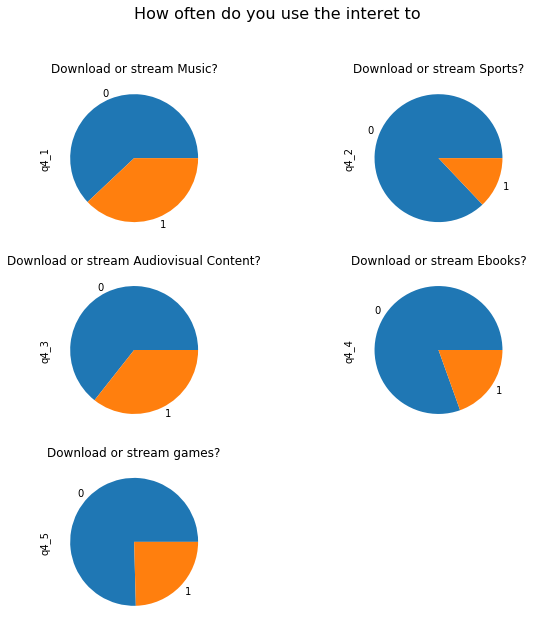

In [95]:
newdf = newDatabase.query('d2 == "1"')

pieDownload_Stream_music = newdf['q4_1'].value_counts();
pieDownload_Stream_sports = newdf['q4_2'].value_counts()
pieDownload_Stream_audiovis = newdf['q4_3'].value_counts();
pieDownload_Stream_ebooks = newdf['q4_4'].value_counts();
pieDownload_Stream_gaming = newdf['q4_5'].value_counts();

fig = plt.figure()
fig.suptitle('How often do you use the interet to', fontsize=16)
q4_1 = plt.subplot(321);
q4_2 = plt.subplot(322);
q4_3 = plt.subplot(323);
q4_4 = plt.subplot(324);
q4_5 = plt.subplot(325);

q4_1 = pieDownload_Stream_music.plot.pie(title = 'Download or stream Music?', ax=q4_1, figsize=(10,10));
q4_2 = pieDownload_Stream_sports.plot.pie(title = 'Download or stream Sports?', ax=q4_2, figsize=(10,10));
q4_3 = pieDownload_Stream_audiovis.plot.pie(title = 'Download or stream Audiovisual Content?', ax=q4_3, figsize=(10,10));
q4_4 = pieDownload_Stream_ebooks.plot.pie(title = 'Download or stream Ebooks?', ax=q4_4, figsize=(10,10));
q4_5 = pieDownload_Stream_gaming.plot.pie(title = 'Download or stream games?', ax=q4_5, figsize=(10,10));